#**The Sparks Foundation GRIP Internship Task 1**

##**Prediction using Supervised Machine Learning**
**(Level - Beginner)**

Author: **Arnab Chakraborty** (*Data Science and Business Analytics Intern at The Sparks Foundation*) 

LinkedIn Profile: https://www.linkedin.com/in/arnab-chakraborty27/







# **Problem Statement**

Predict the percentage obtained by a student based on the number of hours studied by the student per day. This is a simple linear regression problem as it involves only 2 variables.

What will be the predicted percentage if a student studies 9.25 hours/day?

Dataset: http://bit.ly/w-data

**Importing Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score 

**Importing the Dataset**

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

**Previewing the Data**

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

**Visualizing the Data**

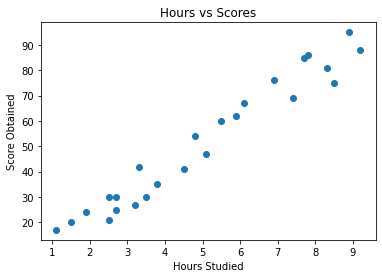

In [6]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

**Dividing the Data**

- x -> Stores Number of Hours studied per day
- y -> Stores Percentage obtained 

In [7]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Splitting the Data**

`train_test_split()` splits the data into Training and Test sets for buliding the Regressor model.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Creating the `LinearRegressor` model and training the model using the training set.

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Visualizing the values of `No. of Hours` using a Scatter Plot and plotting a best-fit line.

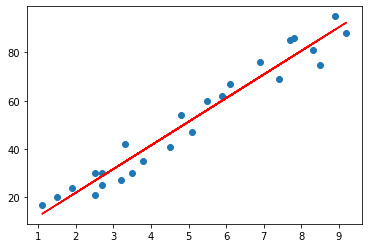

In [10]:
line = regressor.coef_ * x  + regressor.intercept_
plt.scatter(x,y)
plt.plot(x, line, color='red')
plt.show()

Testing the `LinearRegressor` model using the Test data set and displaying the predicted results

In [11]:
y_pred = regressor.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


Visualizing the predictions made by the `LinearRegressor` model with input as the ***training dataset*** using a Scatter Plot and plotting a best-fit line.

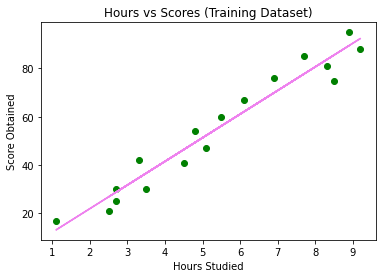

In [12]:
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, regressor.predict(x_train), color='violet')
plt.title('Hours vs Scores (Training Dataset)')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

Visualizing the predictions made by the `LinearRegressor` model with input as the ***test dataset*** using a Scatter Plot and plotting a best-fit line.

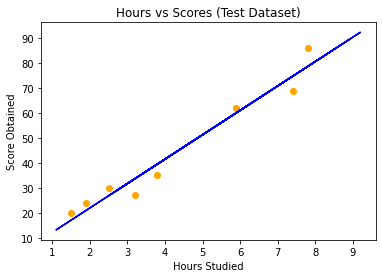

In [13]:
plt.scatter(x_test, y_test, color='orange')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Hours vs Scores (Test Dataset)')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

**Comparing the Actual Result and Predicted Result**

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Predicting the Percentage** if No. of Hours studied is `9.25 hours/day`

In [15]:
test_case = np.array(9.25)
test_case = test_case.reshape(-1, 1)
pred = regressor.predict(test_case)
print('If the student studies for 9.25 hours per day, the predicted score obtained is {}%.'.format(pred[0]))

If the student studies for 9.25 hours per day, the predicted score obtained is 92.91505723477056%.


Finding out the **error in the prediction**

In [16]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('The R-Square of the model is: ', r2_score(y_test, y_pred))

Mean Absolute Error:  4.419727808027651
The R-Square of the model is:  0.9568211104435257
